# Kenya Analysis

In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [2]:
summary_data = pd.read_csv("data/worldometer_coronavirus_summary_data.csv")
summary_data

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,157412,7311.0,140597.0,9504.0,1124.0,3919,182.0,794668.0,19783.0,40169237
1,Albania,Europe,200639,3104.0,190902.0,6633.0,23.0,69828,1080.0,1398152.0,486595.0,2873339
2,Algeria,Africa,211112,6089.0,144909.0,60114.0,15.0,4694,135.0,230861.0,5133.0,44972408
3,Andorra,Europe,18010,132.0,16162.0,1716.0,4.0,232567,1705.0,193595.0,2499935.0,77440
4,Angola,Africa,65208,1735.0,63263.0,210.0,3.0,1900,51.0,1190871.0,34707.0,34311823
...,...,...,...,...,...,...,...,...,...,...,...,...
216,Wallis And Futuna Islands,Australia/Oceania,445,7.0,438.0,0.0,NaN,40602,639.0,20508.0,1871168.0,10960
217,Western Sahara,Africa,10,1.0,8.0,1.0,NaN,16,2.0,NaN,NaN,618121
218,Yemen,Asia,10020,1952.0,6902.0,1166.0,23.0,326,63.0,265253.0,8624.0,30755787
219,Zambia,Africa,210262,3667.0,206443.0,152.0,6.0,11001,192.0,2737800.0,143249.0,19112199


In [3]:
summary_data.sort_values("total_deaths", ascending=False).head(20)

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
211,USA,North America,49741464,806651.0,39397681.0,9537132.0,13485.0,149036,2417.0,757810159.0,2270560.0,333754810
26,Brazil,South America,22118782,615225.0,21351505.0,152052.0,8318.0,103021,2865.0,63776166.0,297046.0,214701617
93,India,Asia,34615757,470115.0,34045666.0,99976.0,8944.0,24739,336.0,644668082.0,460729.0,1399235464
129,Mexico,North America,3894364,294715.0,3250478.0,349171.0,4798.0,29761,2252.0,11904011.0,90973.0,130852697
160,Russia,Europe,9736037,278857.0,8436631.0,1020549.0,2300.0,66675,1910.0,226800000.0,1553178.0,146023223
153,Peru,South America,2239421,201282.0,NaN,NaN,978.0,66605,5987.0,20414072.0,607153.0,33622605
207,UK,Europe,10379647,145424.0,9156066.0,1078157.0,895.0,151768,2126.0,366108215.0,5353111.0,68391673
94,Indonesia,Asia,4257243,143858.0,4105680.0,7705.0,NaN,15335,518.0,55342143.0,199343.0,277622982
100,Italy,Europe,5077445,134077.0,4727214.0,216154.0,708.0,84153,2222.0,121173417.0,2008320.0,60335704
95,Iran,Asia,6129199,130066.0,5908901.0,90232.0,3296.0,71673,1521.0,39093355.0,457145.0,85516321


In [4]:
kenya_data = summary_data.loc[summary_data["country"] == "Kenya"]
kenya_data

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
105,Kenya,Africa,255355,5335.0,248398.0,1622.0,8.0,4605,96.0,2848757.0,51377.0,55447839


In [5]:
ken_df = pd.DataFrame({"Country" : summary_data["country"],
                      "Total Confirmed" : summary_data["total_confirmed"],
                      "Total Deaths" : summary_data["total_deaths"],
                      "Total Recovered" : summary_data["total_recovered"],
                      "Active Cases" : summary_data["active_cases"]})
ken_df = ken_df.loc[ken_df["Country"] == "Kenya"]
ken_df

,Country,Total Confirmed,Total Deaths,Total Recovered,Active Cases
105,Kenya,255355,5335.0,248398.0,1622.0


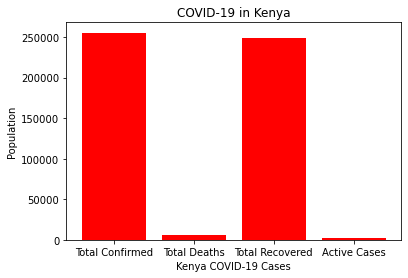

In [6]:
#bar graph displaying effect of COVID in Kenya
Kenya = [255355, 5335.0, 248398.0, 1622.0]
x_axis = np.arange(len(Kenya))
plt.bar(x_axis, Kenya, align="center", color="r")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Total Confirmed", "Total Deaths", "Total Recovered", "Active Cases"])
plt.title("COVID-19 in Kenya")
plt.xlabel("Kenya COVID-19 Cases")
plt.ylabel("Population")
plt.savefig("images/COVID_in_kenya.png")

plt.show()

In [7]:
uk_data = summary_data.loc[summary_data["country"] == "UK"]
uk_data

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
207,UK,Europe,10379647,145424.0,9156066.0,1078157.0,895.0,151768,2126.0,366108215.0,5353111.0,68391673


In [8]:
uk_df = pd.DataFrame({"Country" : summary_data["country"],
                      "Total Confirmed" : summary_data["total_confirmed"],
                      "Total Deaths" : summary_data["total_deaths"],
                      "Total Recovered" : summary_data["total_recovered"],
                      "Active Cases" : summary_data["active_cases"]})
uk_df = uk_df.loc[uk_df["Country"] == "UK"]
uk_df

,Country,Total Confirmed,Total Deaths,Total Recovered,Active Cases
207,UK,10379647,145424.0,9156066.0,1078157.0


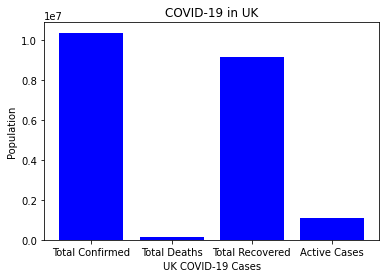

In [9]:
#bar graph displaying effect of COVID in the UK
UK = [10379647, 145424.0, 9156066.0, 1078157.0]
x_axis = np.arange(len(UK))
plt.bar(x_axis, UK, align="center", color="b")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Total Confirmed", "Total Deaths", "Total Recovered", "Active Cases"])
plt.title("COVID-19 in UK")
plt.xlabel("UK COVID-19 Cases")
plt.ylabel("Population")
plt.savefig("images/COVID_in_uk.png")

plt.show()

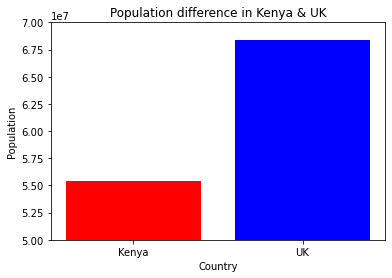

In [10]:
#bar graph of population in Kenya and the UK
population_values = [55447839, 68391673]
x_axis = np.arange(len(population_values))
plt.bar(x_axis, population_values, align="center", color=["r", "b"])

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Kenya", "UK"])
plt.title("Population difference in Kenya & UK")
plt.xlabel("Country")
plt.ylabel("Population")
plt.ylim(50000000,70000000)
plt.savefig("images/uk_vs_kenya_population.png")

In [11]:
#import daily dataset
covid_df = pd.read_csv("data/worldometer_coronavirus_daily_data.csv")
covid_df

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-2-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-2-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-2-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-2-19,Afghanistan,0.0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...
145216,2021-11-28,Zimbabwe,133991.0,40.0,631.0,4705.0,0.0
145217,2021-11-29,Zimbabwe,134226.0,235.0,817.0,4706.0,1.0
145218,2021-11-30,Zimbabwe,134625.0,399.0,1171.0,4707.0,1.0
145219,2021-12-01,Zimbabwe,135337.0,712.0,1846.0,4707.0,0.0


In [12]:
kenya_df = covid_df[covid_df["country"] == "Kenya"]
kenya_df = kenya_df.dropna()
kenya_df

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
69050,2020-3-27,Kenya,31.0,0.0,29.0,1.0,0.0
69051,2020-3-28,Kenya,38.0,7.0,36.0,1.0,0.0
69052,2020-3-29,Kenya,42.0,4.0,40.0,1.0,0.0
69053,2020-3-30,Kenya,50.0,8.0,48.0,1.0,0.0
69054,2020-3-31,Kenya,59.0,9.0,57.0,1.0,0.0
...,...,...,...,...,...,...,...
69661,2021-11-28,Kenya,254951.0,11.0,1487.0,5333.0,1.0
69662,2021-11-29,Kenya,254979.0,28.0,1337.0,5334.0,1.0
69663,2021-11-30,Kenya,255088.0,109.0,1435.0,5335.0,1.0
69664,2021-12-01,Kenya,255164.0,76.0,1479.0,5335.0,0.0


In [13]:
#create timeline
covid_ken = kenya_df[kenya_df.index % 30 == 0]
covid_ken.sort_values("daily_new_cases", ascending=False).head(20)

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
69420,2021-4-01,Kenya,135042.0,984.0,7377.0,2167.0,14.0
69300,2020-12-02,Kenya,85130.0,961.0,7504.0,1484.0,10.0
69540,2021-7-30,Kenya,201954.0,945.0,9590.0,3926.0,16.0
69450,2021-5-01,Kenya,160053.0,735.0,10610.0,2744.0,20.0
69270,2020-11-02,Kenya,56601.0,724.0,5084.0,1027.0,14.0
69180,2020-8-04,Kenya,23202.0,605.0,10237.0,388.0,6.0
69510,2021-6-30,Kenya,184161.0,558.0,11048.0,3634.0,13.0
69570,2021-8-29,Kenya,234952.0,363.0,9289.0,4710.0,16.0
69390,2021-3-02,Kenya,106470.0,345.0,-12521.0,1863.0,4.0
69150,2020-7-05,Kenya,7886.0,309.0,4641.0,160.0,1.0


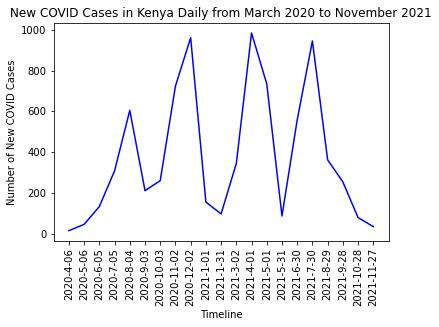

In [14]:
#line graph of daily new cases from March 2020 to November 2021 in Kenya
date = covid_ken["date"]
daily_cases = covid_ken["daily_new_cases"]

plt.plot(date, daily_cases, color="b")
plt.title("New COVID Cases in Kenya Daily from March 2020 to November 2021")
plt.xticks(rotation=90)
plt.xlabel("Timeline")
plt.ylabel("Number of New COVID Cases")
plt.savefig("images/Kenya_daily_new_cases.png")
plt.show()

In [15]:
covid_ken.sort_values("daily_new_deaths", ascending=False)

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
69450,2021-5-01,Kenya,160053.0,735.0,10610.0,2744.0,20.0
69540,2021-7-30,Kenya,201954.0,945.0,9590.0,3926.0,16.0
69570,2021-8-29,Kenya,234952.0,363.0,9289.0,4710.0,16.0
69480,2021-5-31,Kenya,170735.0,88.0,10000.0,3172.0,15.0
69270,2020-11-02,Kenya,56601.0,724.0,5084.0,1027.0,14.0
69420,2021-4-01,Kenya,135042.0,984.0,7377.0,2167.0,14.0
69510,2021-6-30,Kenya,184161.0,558.0,11048.0,3634.0,13.0
69330,2021-1-01,Kenya,96614.0,156.0,-11329.0,1681.0,11.0
69300,2020-12-02,Kenya,85130.0,961.0,7504.0,1484.0,10.0
69360,2021-1-31,Kenya,100773.0,98.0,-14134.0,1763.0,8.0


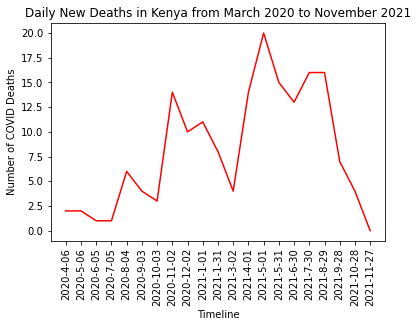

In [16]:
#line graph of daily deaths from March 2020 to November 2021 in Kenya
deaths = covid_ken["daily_new_deaths"]
date = covid_ken["date"]
plt.plot(date, deaths, color="r")
plt.title("Daily New Deaths in Kenya from March 2020 to November 2021")
plt.xticks(rotation=90)
plt.xlabel("Timeline")
plt.ylabel("Number of COVID Deaths")
plt.savefig("images/Kenya_daily_deaths.png")
plt.show()

In [17]:
#drop n/a values
daily_cases = daily_cases.dropna()
deaths = deaths.dropna()

Text(0.5, 1.0, 'Daily Cases vs Deaths in Kenya')

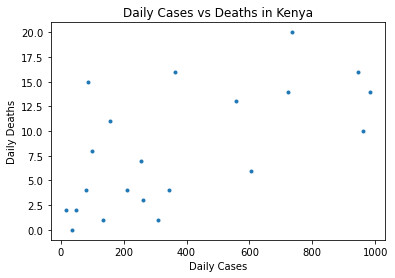

In [18]:
#scatter plot of daily cases vs daily deaths in Kenya
plt.scatter(daily_cases, deaths, marker=".")
plt.xlabel("Daily Cases")
plt.ylabel("Daily Deaths")
plt.title("Daily Cases vs Deaths in Kenya")

The correlation coefficient between the daily new cases and deaths in Kenya is 0.6299936022700905
y = 0.01x + 3.72


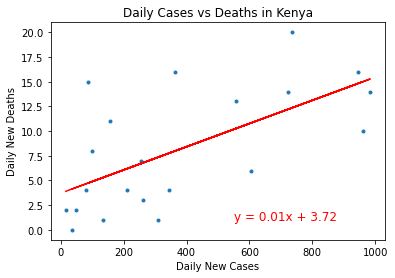

In [19]:
#adding linear regression to the scatter plot
x_axis = daily_cases
y_axis = deaths

result = st.linregress(x_axis, y_axis)
regress_values = x_axis * result.slope + result.intercept

correlation = st.pearsonr(x_axis, y_axis)
print(f"The correlation coefficient between the daily new cases and deaths in Kenya is {correlation[0]}")

equation = "y = " + str(round(result.slope,2)) + "x + " + str(round(result.intercept,2))
print(equation)

plt.scatter(x_axis, y_axis, marker=".")
plt.title("Daily Cases vs Deaths in Kenya")
plt.xlabel("Daily New Cases")
plt.ylabel("Daily New Deaths")

plt.plot(x_axis, regress_values, "r-")
plt.annotate(equation, (550,1), color="r", fontsize=12)
plt.savefig("images/kenya_daily_cases_vs_daily_deaths.png")
plt.show()

In [20]:
#importing vaccination dataset
vaccine_data = pd.read_csv("data/country_vaccinations.csv")

#setting date to the format to enable merging
vaccine_data["date"] = pd.to_datetime(vaccine_data.date)
covid_df["date"] = pd.to_datetime(covid_df.date)

In [21]:
#selecting data only relevant to Kenya
kenya_vaccine = vaccine_data[vaccine_data["country"] == "Kenya"]
kenya_vaccine.to_csv("data/Kenya_vaccination_data.csv", index=False, header=True)
kenya_covid = covid_df[covid_df["country"] == "Kenya"]

In [22]:
#merging two datasets for Kenya to display full dataframe of vaccination and covid cases
kenya_merged = pd.merge(kenya_vaccine,kenya_covid, on="date")
kenya_merged = kenya_merged.dropna()
kenya_merged

,country_x,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,...,daily_vaccinations_per_million,vaccines,source_name,source_website,country_y,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
91,Kenya,KEN,2021-06-03,973987.0,972601.0,1386.0,2273.0,1535.0,1.81,1.81,...,29.0,"Oxford/AstraZeneca, Sputnik V",Ministry of Health,https://twitter.com/MOH_Kenya/status/140662760...,Kenya,171658.0,432.0,10200.0,3223.0,17.0
92,Kenya,KEN,2021-06-04,976541.0,974000.0,2541.0,2554.0,1444.0,1.82,1.81,...,27.0,"Oxford/AstraZeneca, Sputnik V",Ministry of Health,https://twitter.com/MOH_Kenya/status/140662760...,Kenya,171942.0,284.0,10300.0,3240.0,17.0
93,Kenya,KEN,2021-06-05,981887.0,975265.0,6622.0,5346.0,1879.0,1.83,1.81,...,35.0,"Oxford/AstraZeneca, Sputnik V",Ministry of Health,https://twitter.com/MOH_Kenya/status/140662760...,Kenya,172325.0,383.0,10615.0,3264.0,24.0
94,Kenya,KEN,2021-06-06,983580.0,975399.0,8181.0,1693.0,2052.0,1.83,1.81,...,38.0,"Oxford/AstraZeneca, Sputnik V",Ministry of Health,https://twitter.com/MOH_Kenya/status/140662760...,Kenya,172491.0,166.0,10633.0,3287.0,23.0
95,Kenya,KEN,2021-06-07,989029.0,975835.0,13194.0,5449.0,2762.0,1.84,1.81,...,51.0,"Oxford/AstraZeneca, Sputnik V",Ministry of Health,https://twitter.com/MOH_Kenya/status/140662760...,Kenya,172639.0,148.0,9909.0,3308.0,21.0
96,Kenya,KEN,2021-06-08,1005509.0,978127.0,27382.0,16480.0,4972.0,1.87,1.82,...,92.0,"Oxford/AstraZeneca, Sputnik V",Ministry of Health,https://twitter.com/MOH_Kenya/status/140662760...,Kenya,173072.0,433.0,9791.0,3326.0,18.0
97,Kenya,KEN,2021-06-09,1030445.0,979955.0,50490.0,24936.0,8390.0,1.92,1.82,...,156.0,"Oxford/AstraZeneca, Sputnik V",Ministry of Health,https://twitter.com/MOH_Kenya/status/140662760...,Kenya,173661.0,589.0,9940.0,3345.0,19.0
98,Kenya,KEN,2021-06-10,1059117.0,982310.0,76807.0,28672.0,12161.0,1.97,1.83,...,226.0,"Oxford/AstraZeneca, Sputnik V",Ministry of Health,https://twitter.com/MOH_Kenya/status/140662760...,Kenya,174285.0,624.0,10125.0,3362.0,17.0
99,Kenya,KEN,2021-06-11,1095122.0,985070.0,110052.0,36005.0,16940.0,2.04,1.83,...,315.0,"Oxford/AstraZeneca, Sputnik V",Ministry of Health,https://twitter.com/MOH_Kenya/status/140662760...,Kenya,174773.0,488.0,10134.0,3378.0,16.0
102,Kenya,KEN,2021-06-14,1116021.0,987277.0,128744.0,2863.0,18142.0,2.08,1.84,...,337.0,"Oxford/AstraZeneca, Sputnik V",Ministry of Health,https://twitter.com/MOH_Kenya/status/140662760...,Kenya,175681.0,344.0,9960.0,3421.0,11.0


Text(0.5, 1.0, 'Daily Daily Vaccinations New Cases vs Daily New Cases in Kenya')

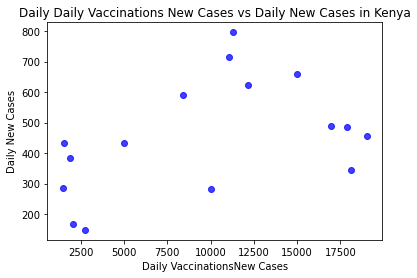

In [23]:
#scatter plot of daily cases vs daily vaccination in Kenya
kenya_merged_vacc = kenya_merged["daily_vaccinations"]
kenya_merged_cases = kenya_merged["daily_new_cases"]
plt.scatter(kenya_merged_vacc, kenya_merged_cases, marker="o", facecolors="blue", alpha=0.75)
plt.xlabel("Daily VaccinationsNew Cases")
plt.ylabel("Daily New Cases")
plt.title("Daily Daily Vaccinations New Cases vs Daily New Cases in Kenya")

The r-squared is: 0.2037173491309611


<function matplotlib.pyplot.show(close=None, block=None)>

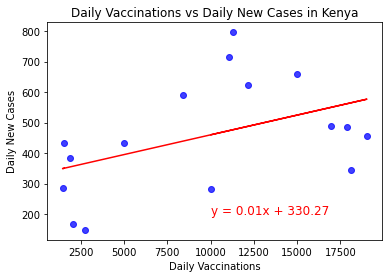

In [24]:
#adding linear regression to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(kenya_merged_vacc, kenya_merged_cases)
regress_values = kenya_merged_vacc * slope + intercept
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(kenya_merged_vacc, kenya_merged_cases, marker="o", facecolors="blue", alpha=0.75)
plt.plot(kenya_merged_vacc, regress_values, "r-")
plt.annotate(line_eq, (10000,200), fontsize=12, color="red")
plt.xlabel("Daily Vaccinations")
plt.ylabel("Daily New Cases")
plt.title("Daily Vaccinations vs Daily New Cases in Kenya")
plt.savefig("images/kenya_daily_cases_vs_vaccination.png")
plt.show

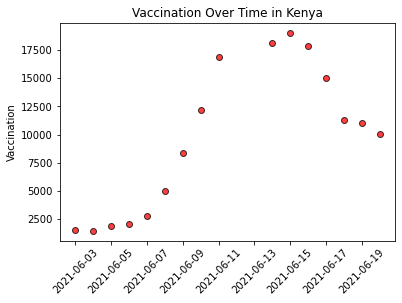

In [25]:
#creating scatter plot of vaccination over time
kenya_time=kenya_merged["date"]
daily_vacc=kenya_merged["daily_vaccinations"]
plt.scatter(kenya_time, daily_vacc, marker="o", facecolors="red", edgecolors="black",alpha=0.75)
plt.xticks(rotation=45)
plt.ylabel("Vaccination")
plt.title("Vaccination Over Time in Kenya")
plt.savefig("images/kenya_vaccination_over_time.png")